In [11]:
!pip install -q -U librosa
!pip install -q -U matplotlib==3.7

### Audio sample visualization using librosa

sampling_rate = number of audio samples per second


Sampling rate =  22050 Audio buffer len= 272538


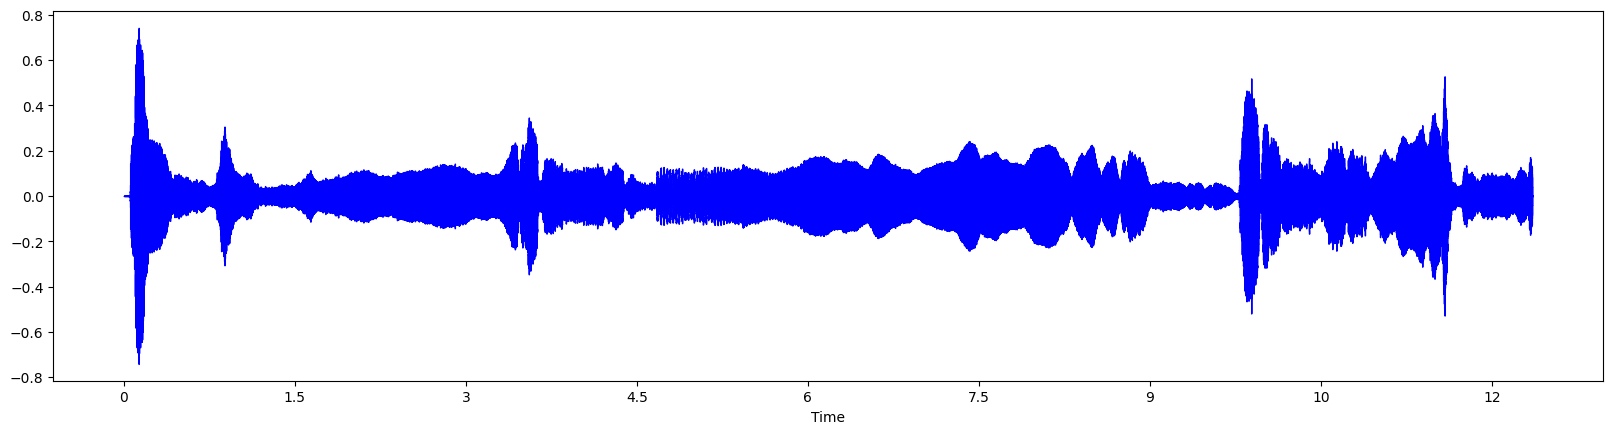

In [19]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import numpy as np 

# https://pixabay.com/sound-effects/flute-78-d-104176/
array, sampling_rate = librosa.load("./flute_78_d-104176.mp3")
print ("Sampling rate = ", sampling_rate, "Audio buffer len=", len(array))

plt.figure().set_figwidth(20)
librosa.display.waveshow(array, sr=sampling_rate, color="blue")

###  FFT visualization of the audio sample

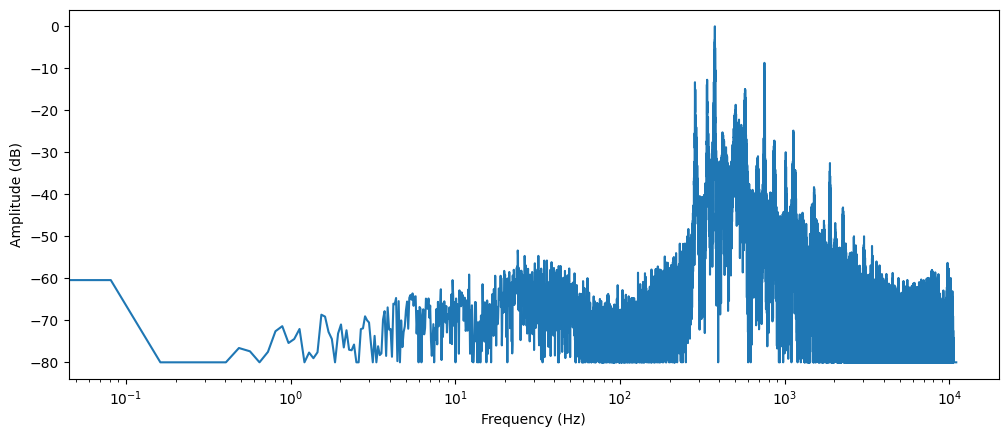

In [21]:
# calculate the DFT
window = np.hanning(len(array))
windowed_input = array * window
dft = np.fft.rfft(windowed_input)

# get the amplitude spectrum in decibels
amplitude = np.abs(dft)
amplitude_db = librosa.amplitude_to_db(amplitude, ref=np.max)

# get the frequency bins
frequency = librosa.fft_frequencies(sr=sampling_rate, n_fft=len(array))

plt.figure().set_figwidth(12)
plt.plot(frequency, amplitude_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")
plt.xscale("log")

### Spectogram
Measure of how the frequencies change in an audio sample

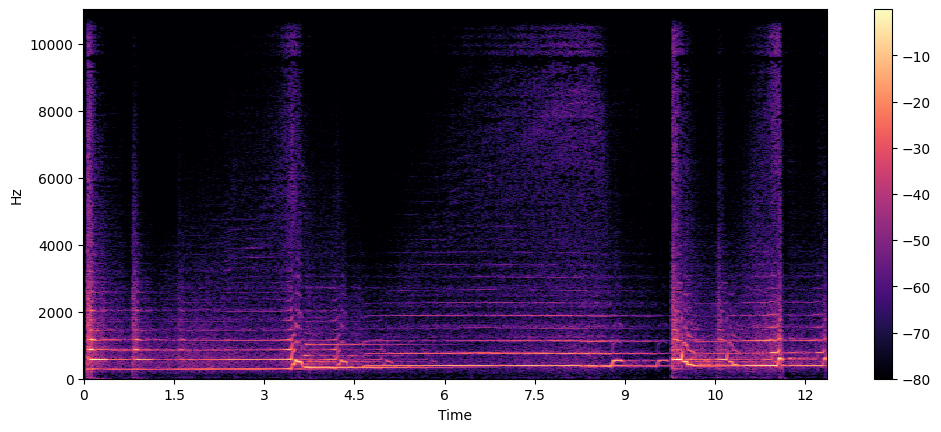

In [23]:
import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

### Mel spectrogram 

For audio visualiation in a different frequency scale.

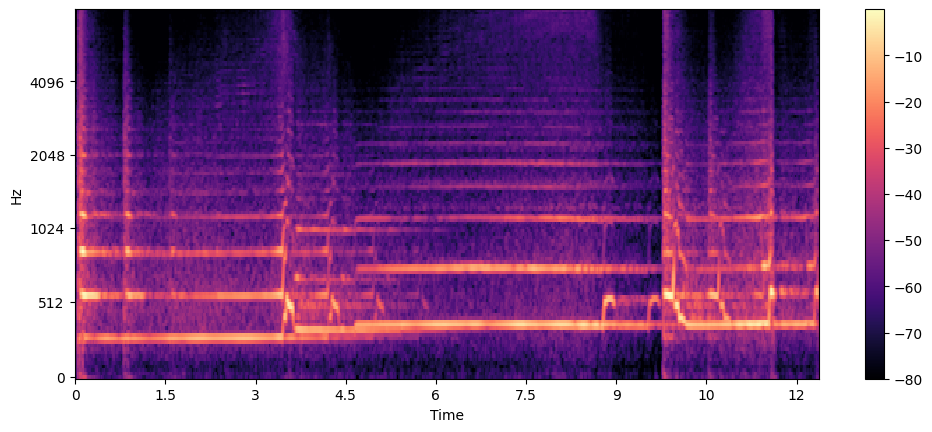

In [24]:
S = librosa.feature.melspectrogram(y=array, sr=sampling_rate, n_mels=128, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_dB, x_axis="time", y_axis="mel", sr=sampling_rate, fmax=8000)
plt.colorbar()